# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


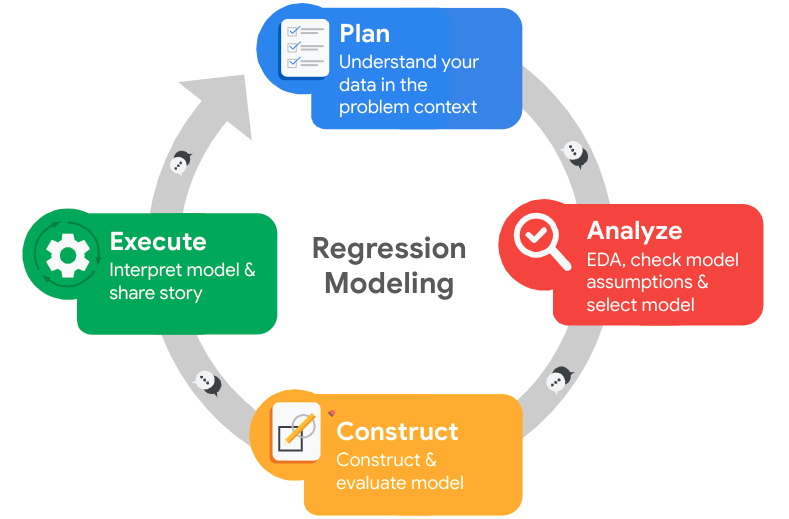

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?

> _**HR Department:** They initiated the project and are the primary stakeholders as they seeks insights to imporve employee retention._

> _**Salifort Motors Leadership:** They're interested in strategies to reduce turnover and enchance employee satisfaction, impacting overall company performance._

> _**Data Analytics Team(if aplicable):** They may collaborate in data analysis and model building to meet project goals effectively._

- What are you trying to solve or accomplish?

> _The main goals is to predict employee turnover and identify factors contributing to it. This helps in devising retention strategies and improving overall employee satisfaction levels._

- What are your initial observations when you explore the data?

> *Initial observation may include:*
> 1. Distribution of satisfaction levels, last evaluation scores, and other variables.
> 2. Correlation between variables (e.g., satisfaction level vs turnover).
> 3. Imbalance in the target variable (turnover vs. non-turnover).
> 4. Variation in turnover rates across departments or salary levels.

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

> _**1. Python Libraries:** Utilize libraries like Pandas, Numpy, Matplotlib, and Scikit-learn for data manipulation, analysis, visualization, and modeling._

> _**2. Documantation and Tutorial:** Refering to official documantation and online tutorial for guidance on using specific or implementating machine learning algoritms._

> _**3. Online Forums and Communities:** Engaging with communities like Stack Overflow or Reddit for troubleshooting spesific issues or seeking advice on best practice in data analysis and modeling._

> _**4. Education Platforms:** Leveraging platforms like Coursera, Udemy for courses or tutorial related to data analysis, machine learning and ethical consideration in AI._

- Do you have any ethical considerations in this stage?

> _Yes, there are several ethical considerations:_

> _**1.Fairness:** Ensuring that the predictive model doesn't exhibit bias against demographic group, avoiding discrimination outcomes in decisions related to employee retention._

> _**2. Privacy:** Respecting employee privacy right by anonymizing and securing sensitive data, adhering to data protection regulation such as GDPR or CCPA._

> _**3. Transparancy:** Providing clear explanation of how the model works and how its predictions are used to inform decision-making, fostering trust among stakeholders._

> _**4. Accountability:** Establishing mechanisms to monitor the model's performance and mitigate any unintented consequence, holding responsible parties accountable for ethical lapses._




## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful function
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()


satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ### 
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

_There no are missing data in the data._

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()


3008

_3008 rows contains duplicate. That is 20% of the data._

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()


satisfaction_level  last_evaluation  number_project  \
396                 0.46             0.57               2   
866                 0.41             0.46               2   
1317                0.37             0.51               2   
1368                0.41             0.52               2   
1461                0.42             0.53               2   

      average_monthly_hours  tenure  work_accident  left  \
396                     139       3              0     1   
866                     128       3              0     1   
1317                    127       3              0     1   
1368                    132       3              0     1   
1461                    142       3              0     1   

      promotion_last_5years  department  salary  
396                       0       sales     low  
866                       0  accounting     low  
1317                      0       sales  medium  
1368                      0       RandD     low  
1461                      0       sales     low

_The above output the first five occurences of rows that are duplicated farther down in the dataframe. How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every columns?_

_I could perform a likehood analysis by essentially appliying Bayes' theorem and multiplying the probabilities of finding each value in each columns, but this doesn't seem necessary. With several continuous variable across 10 columns, it seems very unlikely that these observation are legitimate. I can proccess by dropping them._

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
df1.head()


satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### Check outliers

Check for outliers in the data.

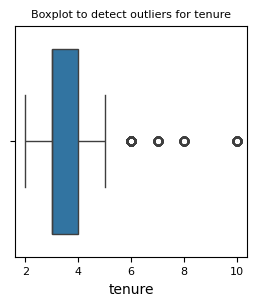

In [11]:
# Create a boxplot to visualize distribution of 'tenure' and detect any outliers
plt.figure(figsize=(3, 3))
plt.title('Boxplot to detect outliers for tenure', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(x=df1['tenure'])
plt.show()


_The boxplot above shows that there are outliers in the `tenure` variable._

_It would be helpful to investigate how many rows in the data contain outlier in the `tenure` columns._

In [12]:
# Determine the number of rows containing outliers

# Compute the 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# Compute the interquatile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower Limit", lower_limit)
print("Upper Limit", upper_limit)

# Identify subset of data containing outlier in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outlier in `tenure`
print("Number of rows in the data containing outlier in `tenure`:", len(outliers))



Lower Limit 1.5
Upper Limit 5.5
Number of rows in the data containing outlier in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?

> _The relationship between variables can provide insight into how different factor might influence each other and the target variable. For example we might observe that employees who work longer hour tend to have higher satisfaction levels or that employees who have been with the company for a longer time are less likely to leave._

- What do you observe about the distributions in the data?

> _The distribution of the numerical variable can provide information about the central tendency, spread, and presence of outlier in the data. Understanding the distribution helps in identifiying potential issues such as skewed data or outlier that may need to be addressed during preprocessing._

- What transformations did you make with your data? Why did you chose to make those decisions?

> _I performed basic data cleaning taks such as renaming columns to standardize their format, checking for and dropping duplicate enteries to ensure data integrity, and identifiying and handling outlier to prevent them from adversely affecting out analysis and modeling._

- What are some purposes of EDA before constructing a predictive model?

> _Exloratory Data Analysis (EDA) helps in understanding the structure of the data, identifiying pattern, relationship, and potential issues, guiding data preprocessing steps, selecting appropriate features for modeling, and informing the choice of predictive modeling techniques._

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

> _Pandas Documentation, Seaborn Documentation, Stack Overflow._

- Do you have any ethical considerations in this stage?

> _Ethical consideration in this stage primarily revolve around data privacy, fairness, and transparency. It's essential to handle sensitive employee data responsibly, ensuring compliance with relevant regulation such as GDPR or CCPA, and mitigating biases in predictive models to prevent discriminatory outcomes._



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize = True))


0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

I could start by creating a stacked boxplot showing average_monthly_hours distributions for number_project, comparing the distributions of employees who stayed versus those who left.

Box plot are very useful in visualizing distribution within data, but they can deceiving without the context of how big the sample that they represent are. So, I could also plot a staked histogram to visualize the distribution of number_project for those who stayed and those who left.

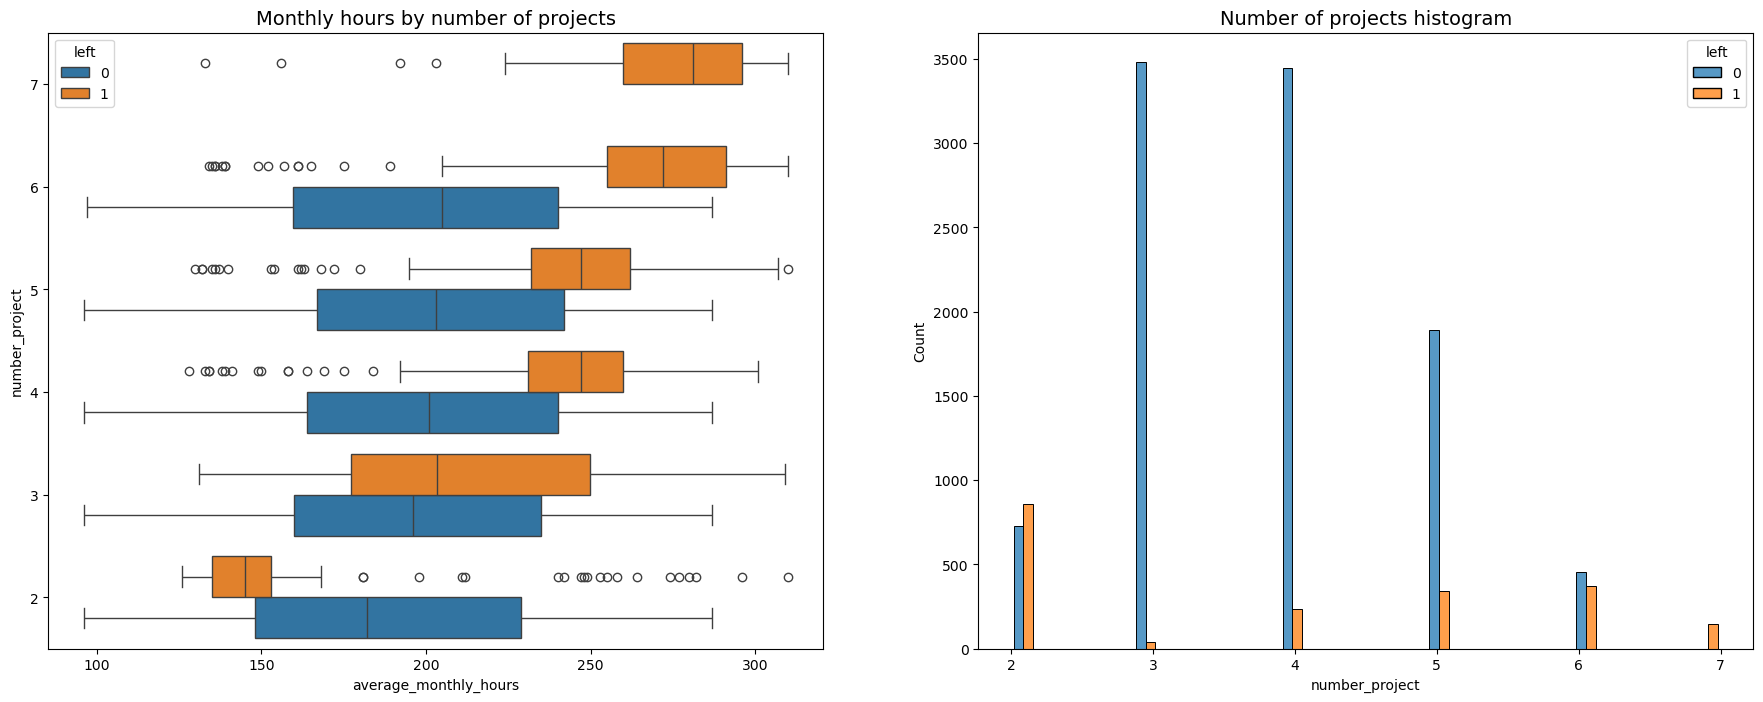

In [14]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize=14)

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=0.8, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize=14)

# Display the plots
plt.show()


_It might be natural that people who work on more project would also work longer hours. This appears to be case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stands out from this plots._
1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B)those who worked much more. Of those in group A. It's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in groups B, it's reasonable to infer that they probably quit. The folks in groups B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their project.
2. Everyone with seven project left the company, and the interquartile ranges of this groups and those who left with six project was ~255-295 hours/month much more than any other group.
3. The optimal number of projects for employees to work on seems to be 3-4. The ratio of left/slayed is very small for those cohorts.
4. If I assume a work of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday-Friday ` = 50 weeks * 40 hours per weeks / 12 months = 166.67 hours per month.` This means that, aside from the employees who worked on two project, every groups - even those who didn't leave the company - worked considerably more hours than this. It seems that employees here are overworked.

As the next step, could confirm that all employee with seven projects left.

In [15]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project'] == 7 ]['left'].value_counts()


1    145
Name: left, dtype: int64

This confirms that all employees with 7 project did leave.

Next I could examine the average monthly hours versus the satisfaction levels.

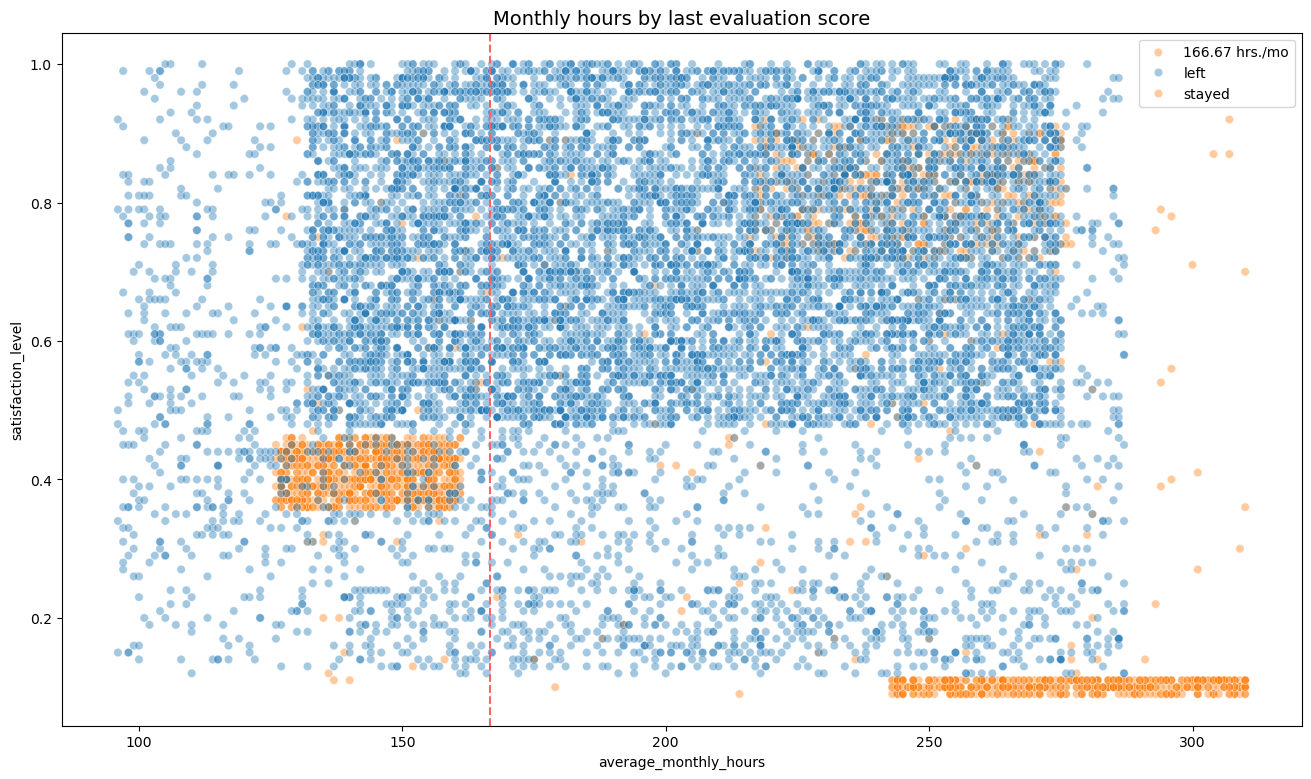

In [16]:
# Create a plot as needed

# Create scatterplot of 'average_monthly_hours' versus 'satisfaction_level', comparing employees who stayed versus those who left
plt.figure(figsize = (16,9))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'satisfaction_level', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = '#ff6361', label = '166.67 hrs./mo.', ls = '--'  )
plt.legend(labels = ['166.67 hrs./mo', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize = '14');


_The scatter plot above shows that there was a sizeable group of employee who worked ~240-315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero._

_The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's diffucult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels._

_Finally, there is a group who wokred ~210-280 hours per month, and they had satisfaction level ranging ~0.7-0.9._

_Note the strange shape of distribution here. This is indicative of data manupulation of synthetic data._

_For the next visualization, it might be insteresting to visualize satisfaction levels by tenure._

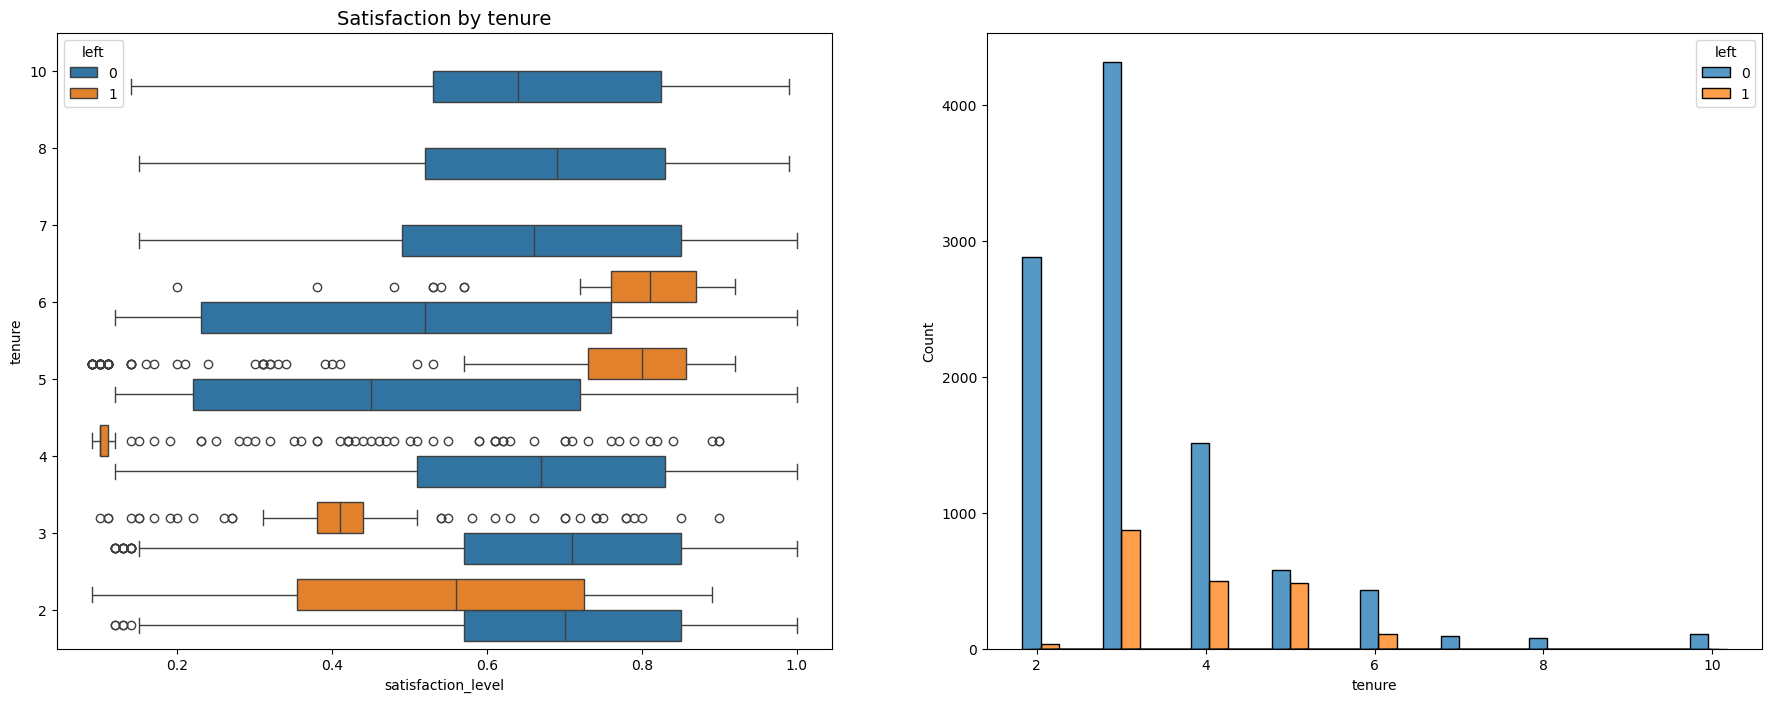

In [17]:
# Create a plot as needed

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distribution of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot (data = df1, x = 'satisfaction_level', y = 'tenure', hue = 'left', orient = "h", ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize = '14')

# Create histogram showing distribution of 'tenure', comparing employees who stayed versus those who left
tenure_stay = df1[df1['left'] == 0]['tenure']
tenure_left = df1[df1['left'] == 1]['tenure']
sns.histplot(data = df1, x = 'tenure', hue = 'left', multiple = 'dodge', shrink = 5, ax = ax[1])

plt.show();


_There are many observation could make from this plot:_
* *Employees who left fall into general categories: dissatified employees with shorter tenures and very satisfied employees with medium-length tenures.*
* *Four-years employees who left seems to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affacted people specifically at the four-year mark, if possible.*
* *The longest-tenure employees didn't leave. Their satisfaction levels. aligned with those of newer employees who stayed.*
* *The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.*

As the next step in analyzing the data, i could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [18]:
# Create a plot as needed
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])


mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

_As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly among employees who stayed, the mean satisfaction score appears to be slightly below the median scores. This indicates that satisfaction levels among those who stayed might be skewed to the left._

Next, examine salary levels for different tenures.

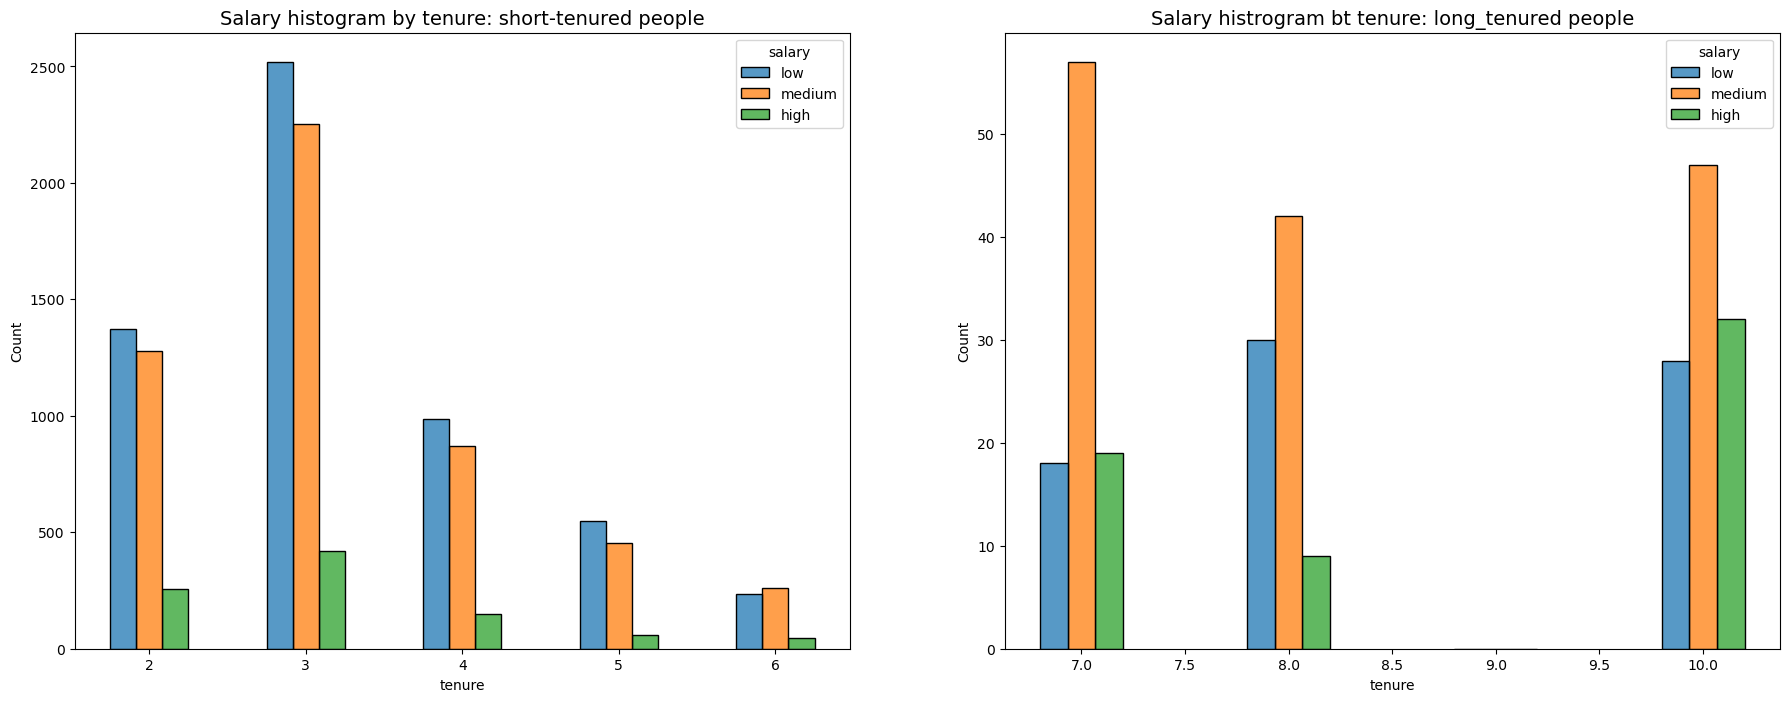

In [19]:
# Create a plot as needed

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data = tenure_short, x = 'tenure', hue = 'salary', discrete = 1,
            hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink = .5, ax = ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize = '14')

# Plot long-tenured histogram
sns.histplot(data = tenure_long, x = 'tenure', hue = 'salary', discrete = 1,
            hue_order = ['low', 'medium', 'high'], multiple = 'dodge', shrink = .4, ax = ax[1])
ax[1].set_title('Salary histrogram bt tenure: long_tenured people', fontsize = '14');


_The plot above show that long-tenured employees were not disproportionately comprised of higher-paid employees._

Next, explore whether there's a correlation between working long hours and receiving high evaluation score. Create a scatterplot of `average_monthly` versus `last_evaluation`.

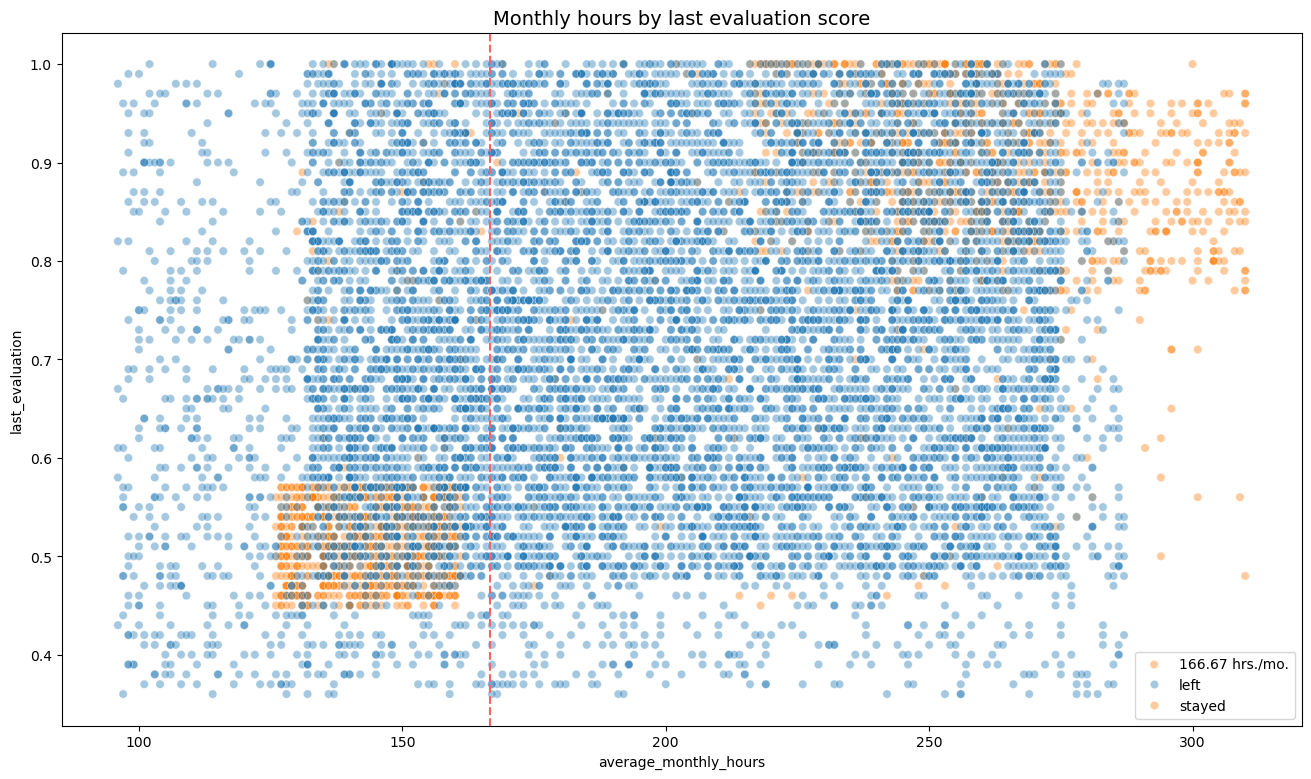

In [20]:
# Create a plot as needed

# Create scatterplot of `average_montly_hours` versus `last_evaluation`
plt.figure(figsize = (16,9))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'last_evaluation', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = '#ff6361', label = '166.67' 'hrs./mo.', ls = '--')
plt.legend(labels = ['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize = '14');


_The following observation can be made from scatterplot above:_
* _The scatter plot indicates two groups of emoloyees who left: overworked employees who performed very well and employees who worked slightly under the normal monthly average of 166.67 hours with lower evaluation scores._
* _There seems to be correlation between hours worked and evaluation score._
* _There isn't a high percentage of employees in the upper left quadrant of the plot, but working long hours doesn't guaretee a good evaluation score._
* _Most of the employees in this company work well over 167 hours per month._

Next, examine whether employees who worked very long hours were promoted in the last five years.

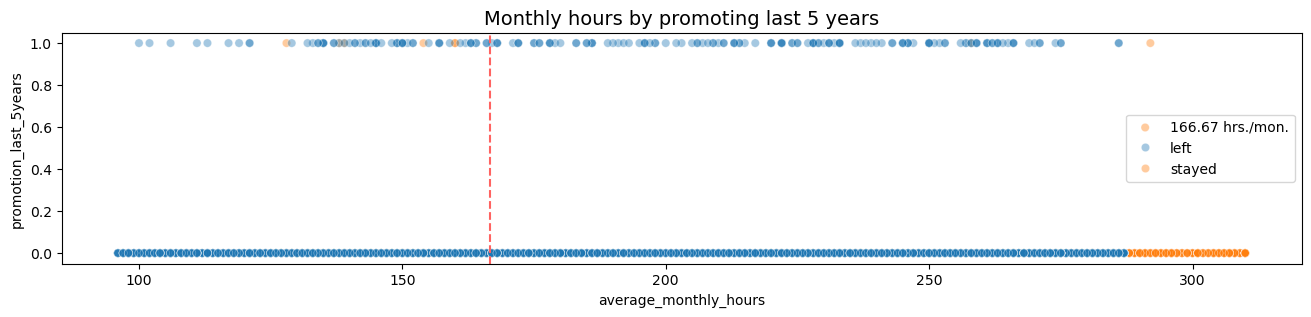

In [21]:
# Create a plot as needed

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize = (16, 3))
sns.scatterplot(data = df1, x = 'average_monthly_hours', y = 'promotion_last_5years', hue = 'left', alpha = 0.4)
plt.axvline(x = 166.67, color = '#ff6361', ls = '--')
plt.legend(labels = ['166.67 hrs./mon.', 'left', 'stayed'])
plt.title('Monthly hours by promoting last 5 years', fontsize = '14');


_The above shows the following:_
* _Very few employees who were promoted in the last five years left._
* _Very few employees who worked the most hours were promoted._
* _All of the employees who left were working the longest hours._

Next, inspect how the employees who left are distributed across departments.

In [22]:
# Display counts for each department
df1["department"].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: department, dtype: int64

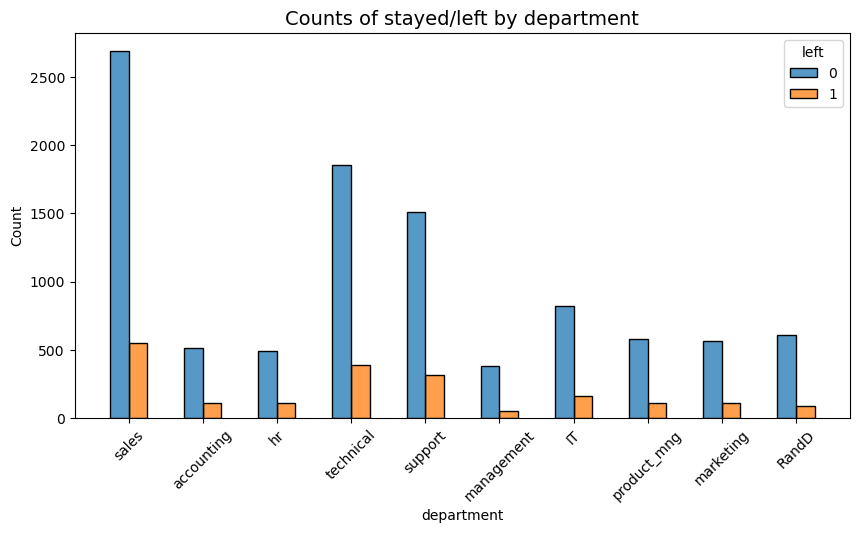

In [23]:
# Create a plot as needed

# Create stacked histogram to compare deparment distribution of employees who left to that of employees who didn't
plt.figure(figsize = (10,5))
sns.histplot(data = df1, x = 'department', hue = 'left', discrete = 1,
            hue_order = [0, 1], multiple = 'dodge', shrink =.5)
plt.xticks(rotation = '45')
plt.title('Counts of stayed/left by department', fontsize = 14);

_There doesn't seems to be any department that differs significantly in its proportion of employees who left to those who stayed._

Lastly, check for strong correlation between variables in the data.

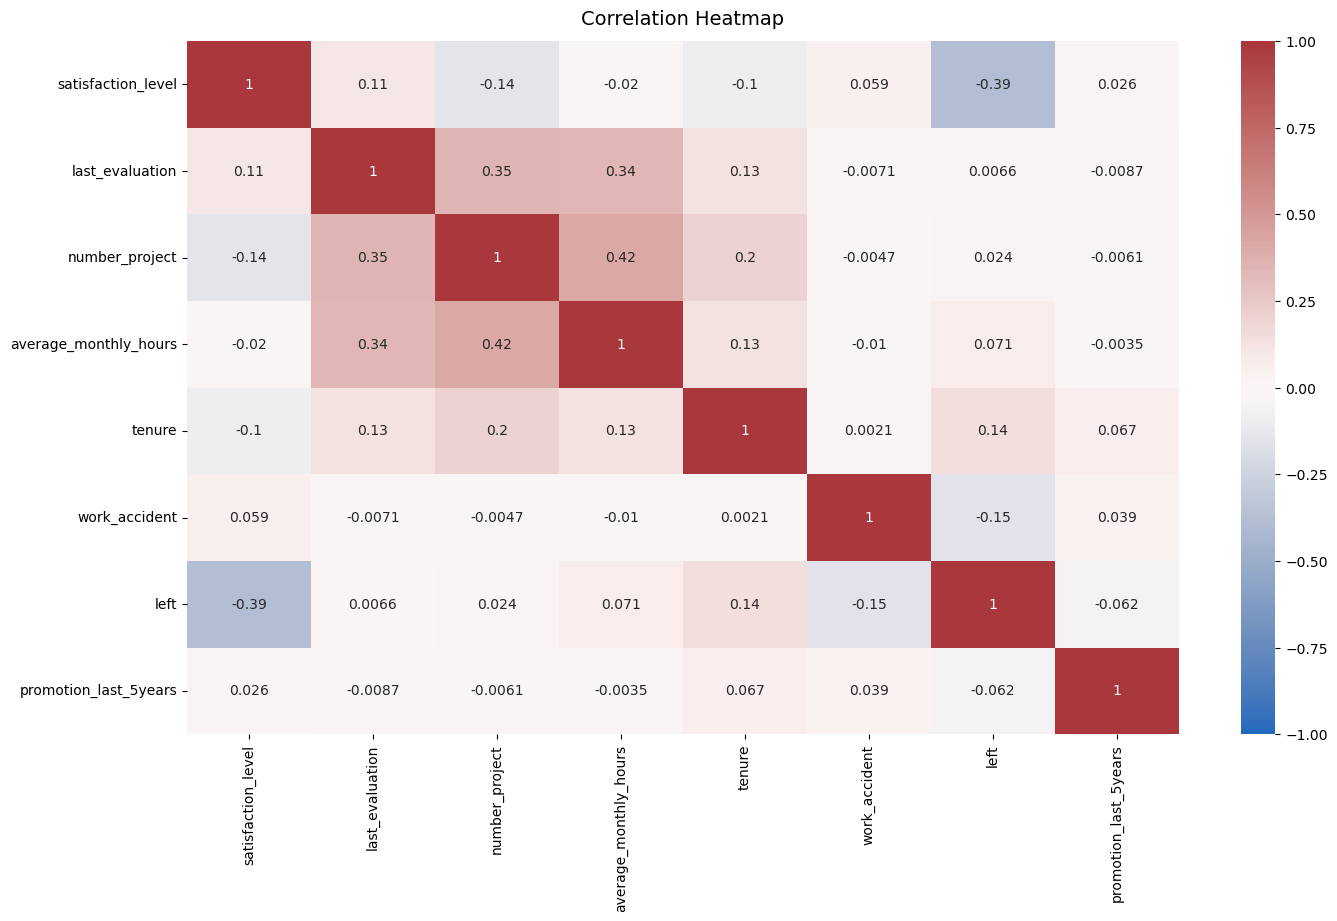

In [24]:
# Create a plot as needed

# Create the correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14}, pad=12)
plt.show()

_The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves in negatively with their satisfaction levels._

### Insights

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifiying to work long hours and not receive promotion or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?

> _One thing that stood out was the shape and distribution of certain variable, such as the unusually high working hours for some employees and the specific patterns in satisfaction levels. These pattern might indicate potential issues like data manipulation of synthetic data. It's also notable that employees with certain tenure lengths show distinct patterns in satisfaction and likehood of leaving, which might indicate structural issues within the company._

- Which independent variables did you choose for the model and why?

> _The following independent variable were choosen for the logistic regression model:_

> _**1. Average Monthly Hours:** This variable is directly related to employee workload and potential burnout._

> _**2. Number of projects:** This represents the workload and might influence job satisfaction and turnover._

> _**3. Satisfaction level:** As a direct measure of employee contentment, this is crucial for predicting turnover._

> _**4. Last evaluation:** This might indicate employee performance and how they are perceived by the company._

> _**5. Tenure:** Length of this time with the company can influence an employee's decision to stay or leaves._

> _**6. Promotion in the last 5 Years:** Lack of promotion can be a significant factor in job dissatisfaction_

> _**7. Salary:** Different levels of compensation can influence an employee's dicision to leave._ 

> _**8. Department:** Different departments may have varying work cultures and pressures._


- Are each of the assumptions met?

> _**1. Categorical Outcomes Variable:** Yes, the outcomes variable(left) is binary._

> _**2. Independent Observations:**  Yes, the observation are assumed to be independet based on the data structure._

> _**3. No Serve Multicollinearity:** This needs to be checked using VIF. If VIF values are high, corrective action like removing or combining correlated variables might be neccesarry._

> _**4. No Extreme Outliers:** Outliers needs to be identified and possibly treated._

> _**5. Linear Relationship with Logit:** This can be checked through scatterplot or Box-Tidwell test for continuous variable._

> _**6. Sufficiently Large Sample Size:** The dataset appears to have a large enough sample size for the number of predictors used._

- How well does your model fit the data?

> _The goodness of fit can be assessed using metrics such as the confusion matrix, accuracy, precision, recall, F1 score, and AUC-ROC curve. The initial model might provide a baseline, but further tuning and validation are needed to determine its effectiveness._

- Can you improve it? Is there anything you would change about the model?

> _**1. Feature Engineering:** Create interaction terms or polynominal features if necessary._

> _**2. Address Multicollinearity:** Remove or combine highly correlated predictors._

> _**3. Handle Outliers:** Treat outliers that might dissproprotionately affect the model._

> _**4. Regularization:** Apply techniques like L1 or L2 regularization to prevent overfitting._

> _**5. Cross Validation:** Use k-fold cross validation to better assess model performance._

- What resources do you find yourself using as you complete this stage?

> _**Seaborn and Matplotlib Documentation, Pandas Documentation, Scikit-learn Documention, Statistical Analysis**_

- Do you have any ethical considerations in this stage?

> _**1. Data Privacy:** Ensure that any personal data used is anonymized and handled according to data._

> _**2. Bias and Fairness:** Check for any biases in the model that could unfair disadvantage certain groups of employees._

> _**3. Transparancy:** Make sure the model is interpretable and its decisions can be explained to stakeholders._

> _**4. Consent:** Ensure that the use of employee data for such analysis is in line with company policies and employees have given their consent._




## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goals is predict whether an employee leaves the company, which is a categorical outcomes variable. So this task invoces classification. More specifically, this involves binary classification, since the outcomes variable `left` can be either 1 (indcating employing left) or (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

Since the variable want to predict (whether an employee leaves the company) is categorical, could either build a Logistic Regression model, or a Tree-based machine learning model.

So could proceed with one of the two following approaches. Or could implement both and determine how they compare.

### Modeling Approach A: Logistic Regression Model

This approach covers implementation of Logistic Regression.

**Logistic Regression**

Note that binominal logistic regression suit the task because it involves binary classification.

Before splitting the data, encode the non-numeric variable. There are two: `deparment` and `salary`.

`department` is categorical variable, which mean can dummy it for modeling.

`salary` is categorical too, but it's ordinal. There's a hierachy to the categories. So it's better not to dummy this column, but rather to convert the levels to number, 0-2.

In [25]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `deparment` column
df_enc = pd.get_dummies(df_enc, drop_first = False)

# Display the new dataframe
df_enc.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
1       6              0     1                      0       1              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

Create a heatmap to visualize how correlated variables are. Consider which variable instrested in examining correlation between.

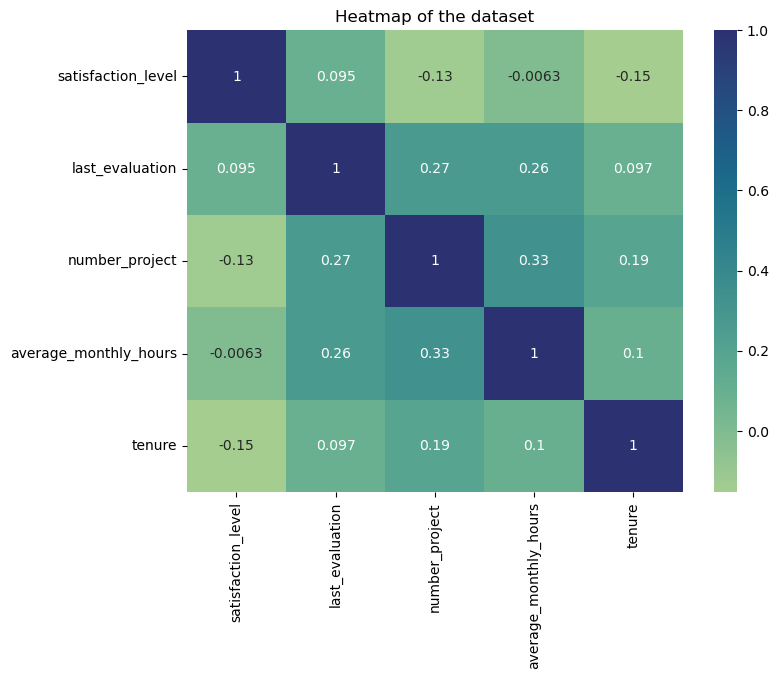

In [26]:
# Create a heatmap to visualize how correlated variable are
plt.figure(figsize = (8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't.

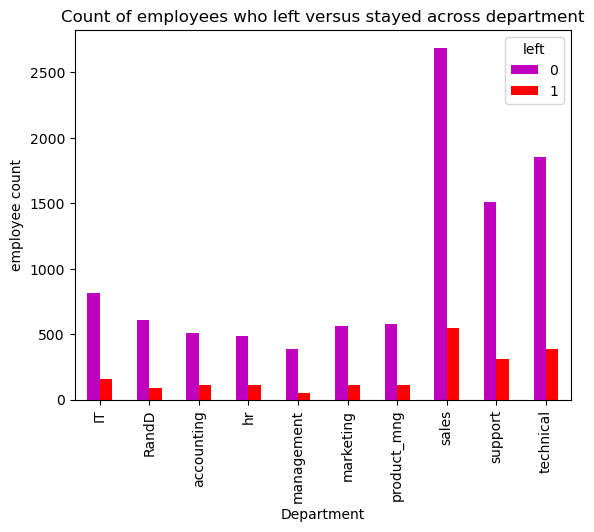

In [27]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't 
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represent employees who left.

pd.crosstab(df1['department'], df1['left']).plot(kind = 'bar', color = 'mr')
plt.title('Count of employees who left versus stayed across department')
plt.ylabel('employee count')
plt.xlabel('Department')
plt.show()

Since logistic regression is quite sensitive to outliers, it would be a good idea, at this stage to remove the outlier in the `tenure` column that were indentified earlier.

In [28]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0              0   
2       4              0     1                      0       1              0   
3       5              0     1                      0       0              0   
4       3              0     1                      0       0              0   
5       3              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

Isolate the outcome variable, which is variable want model to predict.

In [29]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few row of the outcome variable
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

Select the feature want to use in my model. Consider which variable will help predict the outcomes variable `left`

In [30]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   
5       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   
5                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   
5                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0  
5                 1                   0                     0

Split the data into training set and testing set. Don't forget to stratify based on the variable in `y`, since the classes are unbalanced.

In [31]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Construct a logistic regression and fit it to the training dataset.

In [32]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

Test the logistic regression model: use the model to make predictions on the test set.

In [33]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model.

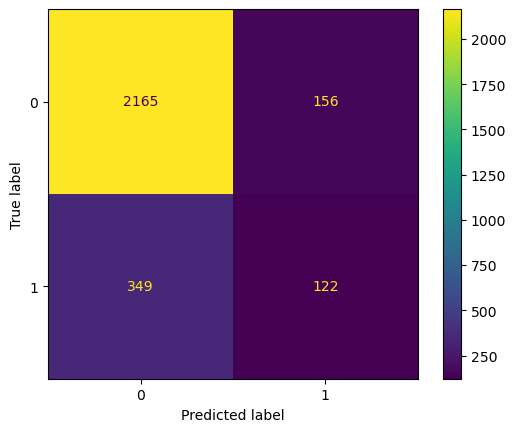

In [34]:
# Compute a confision matrix
log_cm = confusion_matrix(y_test, y_pred, labels = log_clf.classes_)

# Create display of confusion matrix 
log_disp  = ConfusionMatrixDisplay(confusion_matrix = log_cm,
                                  display_labels = log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format = '')

# Display plot
plt.show()

The upper-left quadrant display the number of true negatives. The upper-right quadrant display the number of false positive. The bottom-left quadrant display the number of false negatives. The bottom-right quadrant display the number of true positives.

* True negatives: The number of people who did not leave that the model accurately predicted did not leave.
* False positives: The number of people who did not leave the model inaccurately predicted as leaving.
* False negatives: The number of people who left that the model accurately predicted did not leave.
* True positives: The number of people who left the model accurately predicted as leaving.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.




Create a classification report that the include precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the `left` columns. Since this is a binary classification taks, the class balance inform the way interpret accuracy metrics.

In [35]:
df_logreg['left'].value_counts(normalize = True)

0    0.831468
1    0.168532
Name: left, dtype: float64

There is an approximately 83% -17split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, might want to resample the data to make it more balance. In this case, use this data without modifiying the class balance and continue evaluating the model.

In [36]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names = target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if most important to predict employees who leave, than the score are significantly lower.

### Modeling Approach B: Tree-based Model
This approach covers implementation of Decision Tree and Random Forest. 

Isolate the outcomes variable

In [37]:
# Isolate the outcome variable
y = df_enc['left']

# Display the first few rows of 'y'
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

Select features

In [38]:
# Select features
X = df_enc.drop('left', axis = 1)

# Display the first few rows of 'X'
X.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years  salary  department_IT  \
0       3              0                      0       0              0   
1       6              0                      0       1              0   
2       4              0                      0       1              0   
3       5              0                      0       0              0   
4       3              0                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

Split the data into training, validating, and testing sets.

In [39]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Decision tree - Round 1

Construct a decision tree model set up cross validating grid-search to exhuastively search for the best model parameters.

In [40]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

Fit the decision tree model to the training data.

In [41]:
%%time
tree1.fit(X_train, y_train)

Wall time: 6.32 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'roc_auc', 'recall', 'f1', 'precision', 'accuracy'})

Identify the optimal values for the decision tree parameters.

In [42]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

Identify the best AUC score achieved by the decision tree model on the training set.

In [43]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, can write a function that will help extract all the score from the grid search.

In [44]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

Use the function just defined to get all the score from grid search

In [45]:
# Get all cv scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

All of these scores from the decision tree model are strong indicators of good model performance.

Recall that decision trees can be vulnerable to overfitting, and random forest avoid overfitting by incorporating multiple trees to make predictions. Could construct a random forest model next.

**Random forest - Round 1**

Construct a random forest model and set up cross-validated grid-search to exhaustively search for the best model parameters.

In [46]:
# Instantiate model
rf = RandomForestClassifier(random_state = 0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
            'max_features': [1.0],
            'max_samples': [0.7, 1.0],
            'min_samples_leaf': [1, 2, 3],
            'min_samples_split': [2, 3, 4],
            'n_estimators': [300, 500],
            }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

Fit the random forest model to the training data.

In [47]:
%%time
rf1.fit(X_train, y_train)

Wall time: 36min 47s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'recall', 'f1', 'precision', 'accuracy'})

Specify path to where want to save model

In [48]:
# Define a path to the folder where you want to save the model
path = 'C:/Users/renor/exercises/Coursera'

Define function to pickle the model and read in the model.

In [49]:
def write_pickle(path, model_object, save_as:str):
    '''
    In:
        path: path of folder where want to save the pickle
        model_object: a model want to pickle
        save_as: filename for how want to save the model
        
    Out:
        A call to pickle the model in the folder indicated
    '''
    
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [50]:
def read_pickle(path, saved_model_name:str):
    '''
    In:
        path: path to folder where want to read from
        saved_model_name: filename of pickled model want to read in
        
    Out:
        model: the pickled model
    '''
    
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)
        
    return model

Use the function defined above to save model in a pickle file and then read it in.

In [51]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [52]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

identify the best AUC score achieved by the random forest model on the training set.

In [53]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

Identify the optimal values for the parameters of the random forest model.

In [54]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [55]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.001 lower, which is a negligble amount). This indicate that the random forest model mostly outperforms the decision tree model.

Next, can evaluate the final model on the test set.

Define a function that gets all the scores from a model's predictions.

In [56]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.
    
    In:
        model_name (string): How want model be named in the output table
        model: A fit GridSearchCV object
        X_test_data: numpy array of X_test_data
        y_test_data: numpy array of y_test_data
        
    Out:
        pandas df of precision, recall, f1, accuracy, and AUC scores for model 
    '''
    
    preds = model.best_estimator_.predict(X_test_data)
    
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({'model': [model_name],
                         'precision': [precision],
                         'recall': [recall],
                         'f1': [f1],
                         'accuracy': [accuracy],
                         'AUC': [auc]
                         })
    
    return table

Now use the best best performing model to predict on the test set.

In [57]:
# Get predicions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

The test scores are vey similar to the validation scores; which is good. This appears to be a strong model. Since this test set was only used for this model, can be more confident that model's performance on this data is representative of how it will perform on new, unseen data.

**Feature Engineer**

Might be skeptical of the high evaluation score. There is a chance that there is some data leakage occuring. Data leakage is when use data to train model that should not be used during training, either because it appears in the test data or because it's not data that expceted to have when the model is actually deployed. Training a model with leaked data can given an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` columns is a source of some data leakage. If employees have already dedicated upon quitting, or have been identified by management as people to be fired, they may be working fewer hours.

This first round of decision tree and random forest models included all variable as features. This next round will incorporate feature engineering to build improved models.

Procced by dropping `satisfaction_levels` and creating a new feature that roughly captures whether an employee is overworked. Could call this new feature `overworked`. It will be a binary variable.

In [58]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis = 1)

# Display first few row of new dataframe
df2.head()

last_evaluation  number_project  average_monthly_hours  tenure  \
0             0.53               2                    157       3   
1             0.86               5                    262       6   
2             0.88               7                    272       4   
3             0.87               5                    223       5   
4             0.52               2                    159       3   

   work_accident  left  promotion_last_5years  salary  department_IT  \
0              0     1                      0       0              0   
1              0     1                      0       1              0   
2              0     1                      0       1              0   
3              0     1                      0       0              0   
4              0     1                      0       0              0   

   department_RandD  department_accounting  department_hr  \
0                 0                      0              0   
1                 0                      0              0   
2                 0                      0              0   
3                 0                      0              0   
4                 0                      0              0   

   department_management  department_marketing  department_product_mng  \
0                      0                     0                       0   
1                      0                     0                       0   
2                      0                     0                       0   
3                      0                     0                       0   
4                      0                     0                       0   

   department_sales  department_support  department_technical  
0                 1                   0                     0  
1                 1                   0                     0  
2                 1                   0                     0  
3                 1                   0                     0  
4                 1                   0                     0

In [59]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day. 

Define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, could reassign the column using a boolean mask.
- `df3['overworked'] > 175` creates a series of booleans, consisting of `True` for every value > 175 and `False` for every values ≤ 175
- `.astype(int)` converts all `True` to `1` and all `False` to `0` 

In [60]:
# Define `overworked` as working > 175 hrs/weeks
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few row of new column
df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int32

Drop the `average_monthly_hours` columns.

In [61]:
# Drop the `average_monthly_hours` columns
df2 = df2.drop('average_monthly_hours', axis = 1)

# Display first few row of resulting dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0              0                 0   
1                      0       1              0                 0   
2                      0       1              0                 0   
3                      0       0              0                 0   
4                      0       0              0                 0   

   department_accounting  department_hr  department_management  \
0                      0              0                      0   
1                      0              0                      0   
2                      0              0                      0   
3                      0              0                      0   
4                      0              0                      0   

   department_marketing  department_product_mng  department_sales  \
0                     0                       0                 1   
1                     0                       0                 1   
2                     0                       0                 1   
3                     0                       0                 1   
4                     0                       0                 1   

   department_support  department_technical  overworked  
0                   0                     0           0  
1                   0                     0           1  
2                   0                     0           1  
3                   0                     0           1  
4                   0                     0           0

Again, isolate the features and target variables.

In [62]:
# Isolate the outcome variable
y = df2['left']

# Select the feauture
X = df2.drop('left', axis = 1)

Split the data intro training testing sets.

In [63]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 0)

**Decision Tree - Round 2**

In [64]:
# Instantiate model
tree = DecisionTreeClassifier(random_state = 0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [4, 6, 8, None],
            'min_samples_leaf': [2, 5, 1],
            'min_samples_split': [2, 4, 6]
            }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision','recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [65]:
%%time
tree2.fit(X_train, y_train)

Wall time: 4.8 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'roc_auc', 'recall', 'f1', 'precision', 'accuracy'})

In [66]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [67]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

This model performs very well, even without satisfaction levels and detailed hours worked data.

Next, check the other scores.

In [68]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Some the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

**Random forest - Round 2**

In [69]:
# Instantiate model
rf = RandomForestClassifier(random_state = 0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3, 5, None],
            'max_features': [1.0],
            'max_samples': [0.7, 1.0],
            'min_samples_leaf': [1, 2, 3],
            'min_samples_split': [2, 3, 4],
            'n_estimators': [300, 500]
            }

# Assign a dictionary of scoring metric to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [70]:
%%time
rf2.fit(X_train, y_train)

Wall time: 27min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'roc_auc', 'recall', 'f1', 'precision', 'accuracy'})

In [71]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [72]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [73]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [74]:
# Check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [75]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy      auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.96481


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metrics.

Score the champion model on the test set now.

In [76]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall      f1  accuracy       AUC
0  random forest2 test   0.870406  0.903614  0.8867  0.961641  0.938407

This seems to be stable, well-performing final model.

Plot a confusion matrix to visualize how well it predicts on the test set.

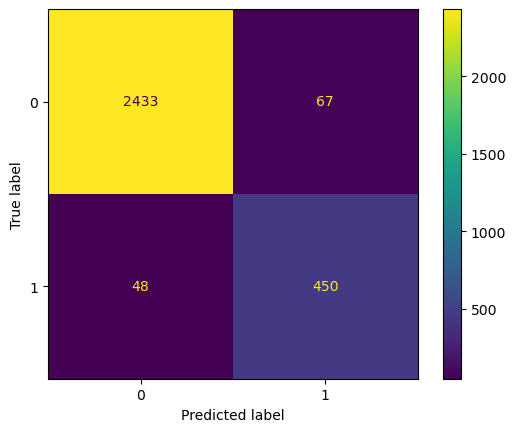

In [77]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                             display_labels = rf2.classes_)

disp.plot(values_format = '');

The model predict more false positives than false negatives, which means that some employees may be identified as risk of quitting or getting fired, when that's actually not the case. But this still a strong model.

For exploratory purpose, might want to inspect the splits of the decision tree model and the most important features in the random forest model.

**Decision tree splits**

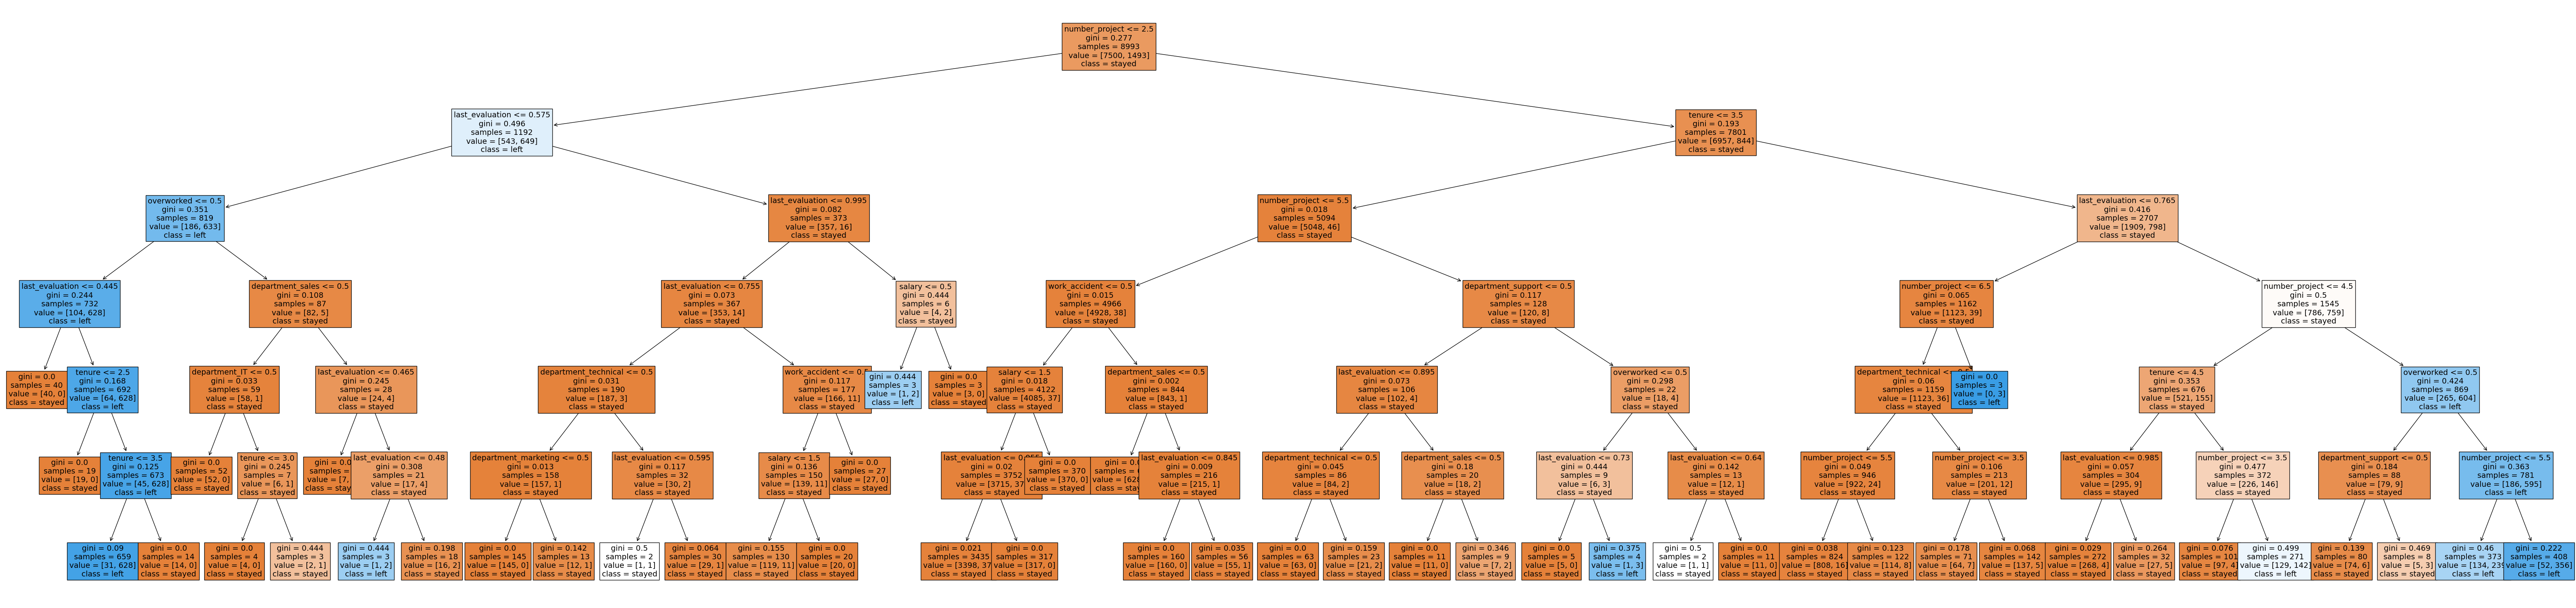

In [79]:
# Plot the tree
plt.figure(figsize = (85,20))
plot_tree(tree2.best_estimator_, max_depth = 6, fontsize = 14, feature_names = X.columns,
         class_names = {0:'stayed', 1:'left'}, filled = True);
plt.show()

**Decision tree feature importance**

In [80]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns = X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_,
                                columns = ['gini_importance'],
                                index = X.columns
                                )

tree2_importances = tree2_importances.sort_values(by = 'gini_importance', ascending = False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] !=0]
tree2_importances

gini_importance
last_evaluation              0.343958
number_project               0.343385
tenure                       0.215681
overworked                   0.093498
department_support           0.001142
salary                       0.000910
department_sales             0.000607
department_technical         0.000418
work_accident                0.000183
department_IT                0.000139
department_marketing         0.000078

Create a barplot to visualize the decision tree feature importances.

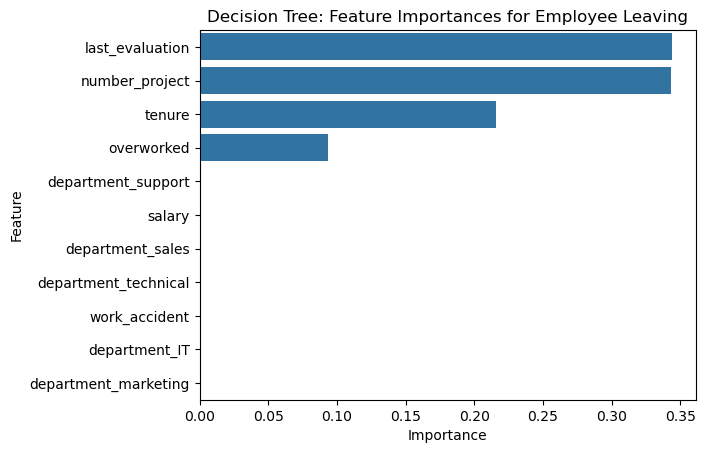

In [82]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance in that order. These variable are most helpful in predicting the outcomes variable: `left`.

**Random forest feature importance**

Plot the feature importances for the random forest model.

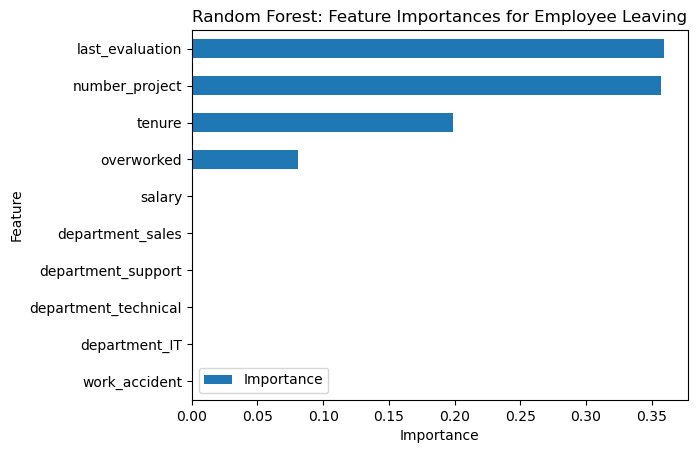

In [83]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature": feat, "Importance": feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind = 'barh', ax = ax1, x = "Feature", y = "Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize = 12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance. In that order. These variable are most helpful in predicting the outcomes variable, `left` and they are same as the ones by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?

> _**1. Importance Features:** The features `last_evaluation`, `number_project`, `tenure` and `overworked` were identified as the most important in predicting whether an employee will leave the company._
 
> _**2. Model performance:** The random forest model performed slightly better than the decision tree model in terms of AUC, precision, recall, F1-score, and accuracy._

> _**3. False positive vs. False Negatives:** The confusion matrix indicated more false positives than false negatives. This mean that some employees were incorrectly predicted as likely to leave, which might lead to unneccessary interventions but less risk of missing those who actually intend to leave._

- What business recommendations do you propose based on the models built?

> _**1. Focus on Key Features:** Given the importance of `last_evaluation`, `number_project`, `tenure` and `overworked`, HR and management should monitor these factor closly._

> _**2. Intervention Programs:** Develop targeted intervation programs for employees identified as high risk based on these features._

> _**3. Regular Monitoring:** Implement a regular monitoring system using the model to identify high risk employees early._

> _**4. Employee Feedback:** Collect and act employee feedback regularly to understand and address their concerns, especially, focusing on workload and evaluation process._

- What potential recommendations would you make to your manager/company?

> _**1. Model Improvement:** Explore more advanced models or ensemble methods to furher improve prediction accuracy._

> _**2. Feature Engineer:** Enchance feature engineering efforts, such as creating more derived features from existing data, to capture more complex relationships._

> _**3. Cross-validation Strategy:** Implement more robist cross-validation strategies, such as stratified k-fold cross-validation, to ensure the model generalized well across different subset of the data._

- Do you think your model could be improved? Why or why not? How?

> _Yes, the model could potentially be improved. The reason is Feature engineer, Advanced algoritms, hyperparamer tuning. cross validation, and regularization technique._

- Given what you know about the data and the models you were using, what other questions could you address for the team?

> _Some point will be question for the team:_

> _**1. Employee Engagement**_

> _How do engagement levels and participant in company events correlate with employee retention?_

> _Can we implement and measure the impact of a comprehensive employee engagement program?_

> _**2. Training amd Development**_

> _How does participant in training and developmnent programs affect employee turnover?_

> _**3. Work-life Balance**_

> _What are the specific factor contributing to employee feeling overworked?_

- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

> _Scikit-learn Documentation, Matplotlib Documentation, Seaborn Documentation, Pandas Documentation, Hyperparameter Tuning Resources._

- Do you have any ethical considerations in this stage?

> _Bias and Fairness, Privacy and Confidentiality, Transparency, and Impact or Employees._



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achived precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82% on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87%, recall of 90.4%, f1-score of 88.7% and accuracy of 96.2% on the test set. The random forest modestly out performed the decision tree model.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirms that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:
* Cap the number of project that employees can be work on.
* Consider promoting employees who have been with the company for at least 4 years, or conduct further investigation about why-4 year tenured employees are so dissatisfied.
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, from them about this. If the expectation around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who worked 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Next steps**

If may be justified to still have some concern about data leakage. It could be prudent to consider how prediction change when `last_evaluation` is removed from the data. It's possible that evaluation aren't perfomed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stayed, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.